# Plotting Simhit Timing

In [1]:
import ROOT
import pyLCIO as LCIO

ROOT.EnableImplicitMT()

Welcome to JupyROOT 6.26/06
Loading LCIO ROOT dictionaries ...


In [2]:
in_file = "/home/rhillman/work/data/DataMuC_MuColl10_v0A/v2/reco/photonGun_E_250_1000/photonGun_E_250_1000_reco_0.slcio" # File to read.
collections = ["ECalBarrelCollection", "ECalEndcapCollection"]  # What collections to include?

reader = LCIO.IOIMPL.LCFactory.getInstance().createLCReader(LCIO.IO.LCReader.directAccess)   # Create LCIO file reader.
reader.setReadCollectionNames(collections)  # Set collections to be read.
reader.open(in_file)    # Open collections.

event = reader.readNextEvent().getEventNumber()

In [3]:
# Style
ROOT.gStyle.SetOptTitle(1)
ROOT.gStyle.SetTitleTextColor(17)
ROOT.gStyle.SetTitleAlign(23)
ROOT.gStyle.SetOptStat(0)

ROOT.gStyle.SetCanvasColor(1)
ROOT.gStyle.SetTitleColor(17, "XYZ")
ROOT.gStyle.SetTitleSize(.023, "XYZ")
ROOT.gStyle.SetTitleOffset(1.1, "X")
ROOT.gStyle.SetTitleOffset(.9, "Y")

ROOT.gStyle.SetLabelColor(17, "XYZ")
ROOT.gStyle.SetLabelOffset()
ROOT.gStyle.SetNdivisions(103, "XY")

# Set axis, label, and title attributes
ROOT.gStyle.SetAxisColor(17, "XYZ")
ROOT.gStyle.SetLabelSize(0.02, "XYZ")

ROOT.gStyle.SetPalette(ROOT.kDarkBodyRadiator)

In [4]:
nbins = 900
low = -2400
high = 2400
h1 = ROOT.TH2D(name="xy_cal", 
               title="#bf{Transverse Cross-Section};#bf{#it{x,}} #bf{mm};#bf{#it{y,}} #bf{mm}",
               nbinsx=nbins,
               xlow=low,
               xup=high,
               nbinsy=nbins,
               ylow=low,
               yup=high
               )

In [5]:
for event in reader:
    for collection_tuple in event:
        collection = collection_tuple[1]
        if collection.getNumberOfElements() != 0:
            for simhit in collection:
                position = simhit.getPosition()
                x = position[0]
                y = position[1]
                z = position[2]
                energy = simhit.getEnergy()
                time = simhit.getTimeCont(0)
                h1.Fill(x, y, energy)

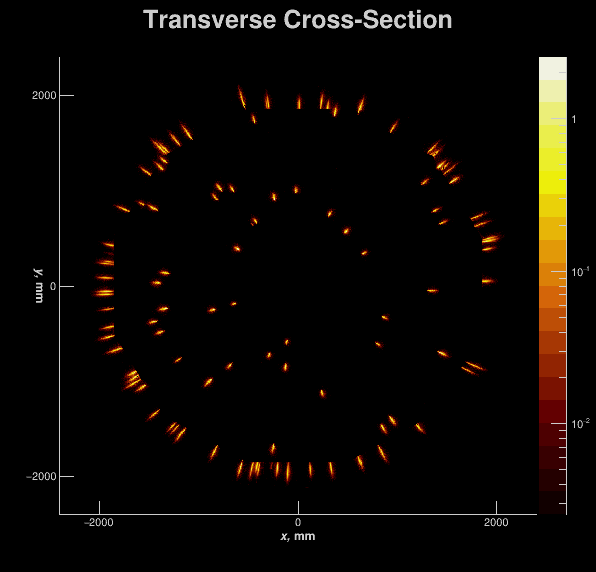

In [6]:
# %jsroot on

width = 600
height = width
h1.GetYaxis().CenterTitle()
h1.GetYaxis().RotateTitle()
h1.GetXaxis().CenterTitle()
c = ROOT.TCanvas("c1", "2-D Histograms", width, height)
c.GetPad(0).SetLogz()
yaxis = h1.GetYaxis()
h1.Draw("COLZ PLC")
c.Draw()